In [1]:
import pandas as pd
import numpy as np

In [2]:
dtypes = ['int64', 'int32', 'float64', 'complex', 'object', 'bool']
data = dict([(x, np.ones(shape=2000).astype(x)) for x in dtypes])

In [3]:
data

{'int64': array([1, 1, 1, ..., 1, 1, 1], shape=(2000,)),
 'int32': array([1, 1, 1, ..., 1, 1, 1], shape=(2000,), dtype=int32),
 'float64': array([1., 1., 1., ..., 1., 1., 1.], shape=(2000,)),
 'complex': array([1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j], shape=(2000,)),
 'object': array([1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0], shape=(2000,), dtype=object),
 'bool': array([ True,  True,  True, ...,  True,  True,  True], shape=(2000,))}

In [4]:
df = pd.DataFrame(data)
df

,int64,int32,float64,complex,object,bool
0,1,1,1.0,1.0+0.0j,1.0,True
1,1,1,1.0,1.0+0.0j,1.0,True
2,1,1,1.0,1.0+0.0j,1.0,True
3,1,1,1.0,1.0+0.0j,1.0,True
4,1,1,1.0,1.0+0.0j,1.0,True
...,...,...,...,...,...,...
1995,1,1,1.0,1.0+0.0j,1.0,True
1996,1,1,1.0,1.0+0.0j,1.0,True
1997,1,1,1.0,1.0+0.0j,1.0,True
1998,1,1,1.0,1.0+0.0j,1.0,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype     
---  ------   --------------  -----     
 0   int64    2000 non-null   int64     
 1   int32    2000 non-null   int32     
 2   float64  2000 non-null   float64   
 3   complex  2000 non-null   complex128
 4   object   2000 non-null   object    
 5   bool     2000 non-null   bool      
dtypes: bool(1), complex128(1), float64(1), int32(1), int64(1), object(1)
memory usage: 88.0+ KB


In [6]:
df.memory_usage(index=False, deep=True)

int64      16000
int32       8000
float64    16000
complex    32000
object     64000
bool        2000
dtype: int64

In [7]:
int64 = df.get('int64')
int64

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: int64, Length: 2000, dtype: int64

In [8]:
df = pd.DataFrame({'A': range(1, 6),
                   'B': range(10, 0, -2),
                   'C C': range(10, 5, -1)})
df

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [9]:
# query
df.query('A < B')

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8


In [10]:
df[df.A < df.B]

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8


In [11]:
df.query('B == `C C`')

,A,B,C C
0,1,10,10


In [12]:
df[df.B == df['C C']]

,A,B,C C
0,1,10,10


In [13]:
# eval
pd.eval('D = df.A * 2', target=df)

,A,B,C C,D
0,1,10,10,2
1,2,8,9,4
2,3,6,8,6
3,4,4,7,8
4,5,2,6,10


In [14]:
# cut
df = np.array([1,2,3,4,5,6,7,8,9,10])
pd.cut(df, bins=20, labels=False)

array([ 0,  2,  4,  6,  8, 11, 13, 15, 17, 19])

In [15]:
df = np.array(np.arange(1,101))
pd.cut(df, bins=5, labels=['0-20', '20-40', '40-60', '60-80', '80-100'], precision=20)

['0-20', '0-20', '0-20', '0-20', '0-20', ..., '80-100', '80-100', '80-100', '80-100', '80-100']
Length: 100
Categories (5, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100']

In [16]:
# where vs mask
# where : replace when where condition is false
# mask : replaces when where condition is True

df = pd.Series(range(10))
arr = df.where(df>5, 99) # df>5 False = 99, true = df
arr

0    99
1    99
2    99
3    99
4    99
5    99
6     6
7     7
8     8
9     9
dtype: int64

In [17]:
arr = df.mask(df>5, 99) # df>5 true = 99, false = df
arr

0     0
1     1
2     2
3     3
4     4
5     5
6    99
7    99
8    99
9    99
dtype: int64

In [18]:
# multiplication, dot, @
# Dot
df1 = np.array([[1,2], [3,4]])
df2 = np.array([[1,2], [3,4]])
df3 = df1 * df2
df3

array([[ 1,  4],
       [ 9, 16]])

In [19]:
# dot
df3 = np.dot(df1, df2)
df3

array([[ 7, 10],
       [15, 22]])

In [20]:
# @
df3 = df1 @ df2
df3

array([[ 7, 10],
       [15, 22]])

In [21]:
# apply, map

df = pd.DataFrame([[4,9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [22]:
print(df.apply(np.sqrt)) 
print(df.apply(np.sum, axis=1)) # 4+9
print(df.apply(lambda x: x > 5))

     A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0
0    13
1    13
2    13
dtype: int64
       A     B
0  False  True
1  False  True
2  False  True


In [23]:
d = {'Col1' : 'Hello, ', 'Col2' : 'World!'}
df = pd.DataFrame(data=d, index=[1])
df

,Col1,Col2
1,"Hello,",World!


In [24]:
df.map(lambda x: len(x))

,Col1,Col2
1,7,6


In [25]:
df1 = df.map("I am {}".format)
print(df1)

           Col1         Col2
1  I am Hello,   I am World!


In [26]:
df = pd.DataFrame([[1,2,3], [4,5,6]])
df

,0,1,2
0,1,2,3
1,4,5,6


In [27]:
df.agg(['sum', 'min', 'max', 'mean', 'median'], axis=1)

,sum,min,max,mean,median
0,6.0,1.0,3.0,2.0,2.0
1,15.0,4.0,6.0,5.0,5.0


In [28]:
# multi Indexing
data = [
    [1,1,3,3,5,5,5,8,8,8],
    [11,12,13,14,15,16,17,18,19,20]
]
tup = tuple(zip(*data))
tup

((1, 11),
 (1, 12),
 (3, 13),
 (3, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (8, 18),
 (8, 19),
 (8, 20))

In [29]:
df = pd.MultiIndex.from_tuples(tup, name=['first', 'second'])
df

MultiIndex([(1, 11),
            (1, 12),
            (3, 13),
            (3, 14),
            (5, 15),
            (5, 16),
            (5, 17),
            (8, 18),
            (8, 19),
            (8, 20)],
           names=['first', 'second'])

In [30]:
df1 = pd.Series(np.random.randn(10), index=tup)
df1

1  11    0.813701
   12   -0.297918
3  13   -0.478617
   14   -0.000682
5  15    0.355520
   16   -0.480976
   17   -0.453967
8  18   -0.083462
   19    0.707407
   20    0.346431
dtype: float64

In [31]:
# date range
pd.date_range('5/1/2020', periods=5, freq='5min')

DatetimeIndex(['2020-05-01 00:00:00', '2020-05-01 00:05:00',
               '2020-05-01 00:10:00', '2020-05-01 00:15:00',
               '2020-05-01 00:20:00'],
              dtype='datetime64[ns]', freq='5min')

In [32]:
pd.date_range(start='1/1/2022', end='1/8/2022', periods=8)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', freq=None)

In [33]:
pd.date_range('12/31/3', periods=5, freq='ME') # month end

DatetimeIndex(['2003-12-31', '2004-01-31', '2004-02-29', '2004-03-31',
               '2004-04-30'],
              dtype='datetime64[ns]', freq='ME')

In [34]:
# resample
index = pd.date_range('1/1/2000', periods=9, freq='min')
df = pd.Series(range(len(index)), index=index)
df

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: min, dtype: int64

In [35]:
df.resample('5min').sum() # sum = 1+2+3+4

2000-01-01 00:00:00    10
2000-01-01 00:05:00    26
Freq: 5min, dtype: int64

In [36]:
df.resample('5min', label='right', closed='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [37]:
# all (and), any (or)
data = {'col1' : [True, True],
        'col2' : [True, False]}
df = pd.DataFrame(data)
df

,col1,col2
0,True,True
1,True,False


In [38]:
print(df.all())
print(df.all(axis=1))

col1     True
col2    False
dtype: bool
0     True
1    False
dtype: bool


In [39]:
print(df.any())
print(df.any(axis=1))

col1    True
col2    True
dtype: bool
0    True
1    True
dtype: bool


In [40]:
# string array
df = pd.Series(['This', 'is', 'String', None, np.nan, np.inf, 1, True, 'Array'], dtype=pd.StringDtype())
df

0      This
1        is
2    String
3      <NA>
4      <NA>
5       inf
6         1
7      True
8     Array
dtype: string

In [41]:
print(df.str.len())
print()
print(df.str.lower())
print()
print(df.str.upper())

0       4
1       2
2       6
3    <NA>
4    <NA>
5       3
6       1
7       4
8       5
dtype: Int64

0      this
1        is
2    string
3      <NA>
4      <NA>
5       inf
6         1
7      true
8     array
dtype: string

0      THIS
1        IS
2    STRING
3      <NA>
4      <NA>
5       INF
6         1
7      TRUE
8     ARRAY
dtype: string


In [42]:
df = pd.DataFrame(np.random.randn(3,2), columns=["  Col 1  ", "  Col 2  "], index=range(3))
df

,Col 1,Col 2
0,-0.889267,-1.638230
1,-2.003593,0.697368
2,-0.217689,-0.895033


In [43]:
df.columns = df.columns.str.strip()
print(df.columns.str.upper())
print(df.columns.str.replace(' ', '_'))

Index(['COL 1', 'COL 2'], dtype='object')
Index(['Col_1', 'Col_2'], dtype='object')


In [44]:
df = pd.Series(['a_b_c', 'd_e_f', np.nan, 'g_h_i'])
df

0    a_b_c
1    d_e_f
2      NaN
3    g_h_i
dtype: object

In [45]:
print(df.str.rsplit('_', expand=True, n=1)) # reverse split n=1 char
print(df.str.split('_').str.get(1))
print(df.str.split('_').str[1])

     0    1
0  a_b    c
1  d_e    f
2  NaN  NaN
3  g_h    i
0      b
1      e
2    NaN
3      h
dtype: object
0      b
1      e
2    NaN
3      h
dtype: object


In [46]:
# regex
s3 = pd.Series(["A", "B", "C", "Aaba", "Baca", "", np.nan, "CABA", "dog", "cat"],  dtype="string",)
s3

0       A
1       B
2       C
3    Aaba
4    Baca
5        
6    <NA>
7    CABA
8     dog
9     cat
dtype: string

In [47]:
s3.str.replace("^.a|dog", "XX-XX", regex=True, case=False)

0          A
1          B
2          C
3    XX-XXba
4    XX-XXca
5           
6       <NA>
7    XX-XXBA
8      XX-XX
9     XX-XXt
dtype: string

In [48]:
# concat
s4 = pd.Series(['a', 'b', 'c', np.nan, 'd'], dtype='string')
s4.str.cat(sep='', na_rep='-')

'abc-d'

In [49]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)

print(s.str[0])
print(s.str[1])
print(s.str[2])

0       A
1       B
2       C
3       A
4       B
5    <NA>
6       C
7       d
8       c
dtype: string
0    <NA>
1    <NA>
2    <NA>
3       a
4       a
5    <NA>
6       A
7       o
8       a
dtype: string
0    <NA>
1    <NA>
2    <NA>
3       b
4       c
5    <NA>
6       B
7       g
8       t
dtype: string


In [50]:
# pattern
pattern = r"[0-9][a-z]"

pd.Series(
    ["1", "2", "3a", "3b", "03c", "4dx"],
    dtype="string",
).str.contains(pattern)

0    False
1    False
2     True
3     True
4     True
5     True
dtype: boolean

In [51]:
# dummies
s = pd.Series(["a", "a|b", np.nan, "a|c"], dtype="string")
s.str.get_dummies(sep='|')

,a,b,c
0,1,0,0
1,1,1,0
2,0,0,0
3,1,0,1


In [52]:
# working with missing values
pd.Series([1,2], dtype=np.int32).reindex([0,1,2])

0    1.0
1    2.0
2    NaN
dtype: float64

In [53]:
pd.Series([True, False], dtype=np.bool).reindex([0,1,2])

0     True
1    False
2      NaN
dtype: object

In [54]:
pd.Series([1,2], dtype=np.dtype('datetime64[ns]')).reindex([0,1,2])

0   1970-01-01 00:00:00.000000001
1   1970-01-01 00:00:00.000000002
2                             NaT
dtype: datetime64[ns]

In [55]:
pd.Series([1,2], dtype='Int32').reindex([0,1,2])

0       1
1       2
2    <NA>
dtype: Int32

In [56]:
pd.Series(['Hello', 'world'], dtype='string').reindex([0,1,2])

0    Hello
1    world
2     <NA>
dtype: string

In [57]:
print(None == None)
print(np.nan == np.nan)
print(pd.NaT == pd.NaT)
print(pd.NA == pd.NA)

True
False
False
<NA>


In [63]:
ser = pd.Series([True, None], dtype="boolean")
print(ser == pd.NA)
print(ser)
print(pd.isna(ser))

0    <NA>
1    <NA>
dtype: boolean
0    True
1    <NA>
dtype: boolean
0    False
1     True
dtype: bool


In [65]:
# mathametical op with None value
print(pd.NA + 1)
print('A' * pd.NA)
print(pd.NA / 0)
print(pd.NA ** 1)
print(pd.NA < 5)
print(pd.isna(pd.NA))

<NA>
<NA>
<NA>
<NA>
<NA>
True


In [71]:
# logical op
print(True | False)
print(True | pd.NA)
print(False | pd.NA)
print()
print(False & True)
print(False & pd.NA)
print(True & pd.NA)

True
True
<NA>

False
False
<NA>


In [72]:
ser1 = pd.Series([np.nan, np.nan, 2, 3])
ser2 = pd.Series([np.nan, 1, np.nan, 4])
print(ser1)
print(ser2)

0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64
0    NaN
1    1.0
2    NaN
3    4.0
dtype: float64


In [77]:
print(ser1 + ser2)
print(ser1 * ser2)

0    NaN
1    NaN
2    NaN
3    7.0
dtype: float64
0     NaN
1     NaN
2     NaN
3    12.0
dtype: float64


In [79]:
print(ser1.cumsum())
print(ser2.cumsum(skipna=False))
print(ser1.cumprod())
print(ser2.cumprod(skipna=False))

0    NaN
1    NaN
2    2.0
3    5.0
dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64
0    NaN
1    NaN
2    2.0
3    6.0
dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64


In [84]:
print(ser2)
print(ser2.fillna(0))
print(ser2.ffill()) # forward fill

0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64
0    0.0
1    0.0
2    2.0
3    3.0
dtype: float64
0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64


In [86]:
print(ser2)
print(ser2.bfill()) # backward fill

0    NaN
1    1.0
2    NaN
3    4.0
dtype: float64
0    1.0
1    1.0
2    4.0
3    4.0
dtype: float64


In [89]:
# interpolation

ser = pd.Series([1,2,np.nan,3,np.nan,5])
print(ser)
print(ser.interpolate())

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    5.0
dtype: float64
0    1.0
1    2.0
2    2.5
3    3.0
4    4.0
5    5.0
dtype: float64


In [91]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
print(df)

     a    b    c     d
0  0.0  NaN -1.0   1.0
1  NaN  2.0  NaN   NaN
2  2.0  3.0  NaN   9.0
3  NaN  4.0 -4.0  16.0


In [93]:
df.interpolate(method='linear', limit_direction='backward', axis=0)

,a,b,c,d
0,0.0,2.0,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,NaN,4.0,-4.0,16.0


In [95]:
idx = pd.date_range('2020-1-1', periods=10, freq='D')
data = np.random.randint(0,10,10).astype(np.float32)
ser = pd.Series(data, index=idx)
ser.iloc[[1,2,5,6,9]] = np.nan
ser

2020-01-01    5.0
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    9.0
2020-01-05    6.0
2020-01-06    NaN
2020-01-07    NaN
2020-01-08    9.0
2020-01-09    9.0
2020-01-10    NaN
Freq: D, dtype: float32

<Axes: >

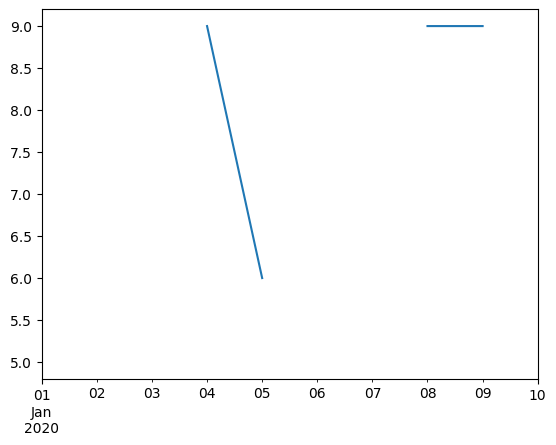

In [96]:
ser.plot()

2020-01-01    5.000000
2020-01-02    6.333333
2020-01-03    7.666667
2020-01-04    9.000000
2020-01-05    6.000000
2020-01-06    7.000000
2020-01-07    8.000000
2020-01-08    9.000000
2020-01-09    9.000000
2020-01-10    9.000000
Freq: D, dtype: float32


<Axes: >

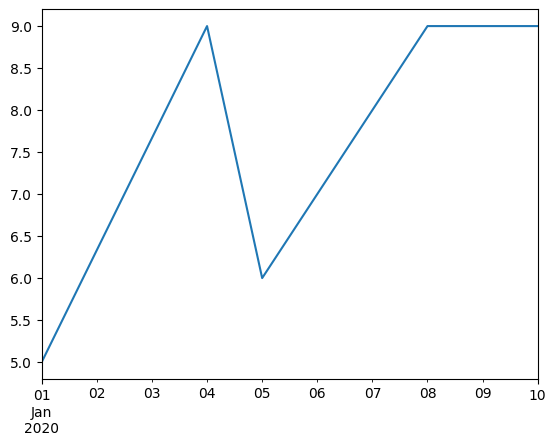

In [99]:
print(ser.interpolate())
ser.interpolate().plot()

In [102]:
# duplicate label
ser = pd.Series([1,1,2], index=['A', 'A', 'B'])
print(ser)
print(ser['A'])

A    1
A    1
B    2
dtype: int64
A    1
A    1
dtype: int64


In [106]:
ser.index.is_unique

False

In [111]:
df = pd.DataFrame({'A' : [0,1,2]}, index=['a', 'a', 'b'])
print(df)
print(df.loc['a'])

   A
a  0
a  1
b  2
   A
a  0
a  1


In [112]:
print(df.index.is_unique)
print(df.columns.is_unique)

False
True


In [113]:
df.index.duplicated()

array([False,  True, False])

In [115]:
df.groupby(level=0).mean()

,A
a,0.5
b,2.0


In [118]:
try: 
    ser = pd.Series([1,2,3], index=['a', 'a', 'b']).set_flags(allows_duplicate_labels=False)
except Exception as e:
    print(e)

Index has duplicates.
      positions
label          
a        [0, 1]


In [121]:
# check if any series/DF allows duplicate labels
df.flags.allows_duplicate_labels

True

In [122]:
data = [12, 15, 14, 10, 10, 20, 30, 100]  

series = pd.Series(data)

print("Skewness:", series.skew())
print("Kurtosis:", series.kurt())  


Skewness: 2.583418285586088
Kurtosis: 6.875110534253125


In [126]:
import pandas as pd
import numpy as np

# Simulate salary data with outliers
data = {'salary': [30, 32, 35, 40, 45, 50, 55, 60, 65, 200]}  # here 200 is outlier
df = pd.DataFrame(data)

Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)
print(lower_bound)
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print("Outliers:\n", outliers)


92.5
2.5
Outliers:
    salary
9     200
